In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.2.3
3.4.2


In [3]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time



In [4]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(4)

In [5]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)



CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [6]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [7]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ArrayOutcome('Expected Annual Damage', variable_name=('A.1_Expected Annual Damage', 'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage', 'A.4_Expected Annual Damage', 'A.5_Expected Annual Damage'), function=<function sum_over_time at 0x120c2c9a0>)
ArrayOutcome('Dike Investment Costs', variable_name=('A.1_Dike Investment Costs', 'A.2_Dike Investment Costs', 'A.3_Dike Investment Costs', 'A.4_Dike Investment Costs', 'A.5_Dike Investment Costs'), function=<function sum_over_time at 0x120c2c9a0>)
ArrayOutcome('Expected Number of Deaths', variable_name=('A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths', 'A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths'), function=<function sum_over_time at 0x120c2c9a0>)
ArrayOutcome('RfR Total Costs')
ArrayOutcome('Expected Evacuation Costs')


In [8]:
# running the model through EMA workbench
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=50, policies=4)

<string>:1: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  from multiprocessing.spawn import spawn_main; spawn_main(tracker_fd=79, pipe_handle=95)
<string>:1: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  from multiprocessing.spawn import spawn_main; spawn_main(tracker_fd=79, pipe_handle=99)
<string>:1: DeprecationWarning: Parsing dates involving a day of

In [12]:
# observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['Expected Annual Damage', 'Dike Investment Costs', 'Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,118,303.464289,1.5,0.425811,61.593008,1.5,0.227062,162.779430,1.5,0.282001,...,7,7,8,2,9,7,2,4,0,dikesnet
1,123,226.325206,10.0,0.568065,187.460173,10.0,0.291067,103.878803,1.5,0.167559,...,7,7,8,2,9,7,2,5,0,dikesnet
2,129,144.551508,10.0,0.532303,327.061472,1.0,0.256963,42.997618,1.5,0.881563,...,7,7,8,2,9,7,2,6,0,dikesnet
3,86,82.331100,1.0,0.892391,31.613910,1.5,0.602096,295.934228,10.0,0.682409,...,7,7,8,2,9,7,2,7,0,dikesnet
4,16,68.493926,10.0,0.979083,305.294848,1.0,0.805799,316.975199,1.0,0.212677,...,7,7,8,2,9,7,2,8,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,62,75.816326,1.0,0.648183,349.747011,1.5,0.052691,134.669322,10.0,0.870203,...,3,5,4,9,0,1,4,49,3,dikesnet
196,97,234.810926,1.0,0.902349,72.457048,10.0,0.458667,66.299240,10.0,0.601996,...,3,5,4,9,0,1,4,50,3,dikesnet
197,13,160.074558,1.5,0.054154,267.245641,10.0,0.929011,325.776514,10.0,0.741847,...,3,5,4,9,0,1,4,51,3,dikesnet
198,113,271.896476,10.0,0.799290,181.949952,1.0,0.539915,166.248566,1.0,0.986347,...,3,5,4,9,0,1,4,52,3,dikesnet


In [13]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

ValueError: Per-column arrays must each be 1-dimensional

In [14]:
##defining specific policies
# for example, policy 1 is about extra protection in upper boundary
# policy 2 is about extra protection in lower boundary
# policy 3 is extra protection in random locations



def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}

# Define specific policy scenarios
policies = [

    # 🔹 Policy 1: Upstream Room for the River + dike at Doesburg
    Policy(
        "policy 1",
        **dict(
            get_do_nothing_dict(),
            **{
                "0_RfR 0": 1, "0_RfR 1": 1, "0_RfR 2": 1,    # RfR at A0
                "A.1_DikeIncrease 0": 5                      # Dike heightening at Doesburg (A1)
            }
        )
    ),

    # 🔹 Policy 2: Downstream RfR + Deventer dike strengthening
    Policy(
        "policy 2",
        **dict(
            get_do_nothing_dict(),
            **{
                "4_RfR 0": 1, "4_RfR 1": 1, "4_RfR 2": 1,    # RfR at A4
                "A.5_DikeIncrease 0": 5                      # Dike heightening at Deventer (A5)
            }
        )
    ),

    # 🔹 Policy 3: Midstream RfR + dike at Zutphen
    Policy(
        "policy 3",
        **dict(
            get_do_nothing_dict(),
            **{
                "1_RfR 0": 1, "2_RfR 1": 1, "3_RfR 2": 1,    # Mixed midstream RfR
                "A.3_DikeIncrease 0": 5                      # Dike heightening at Zutphen (A3)
            }
        )
    ),

    # 🔹 Policy 4: Max Deventer dike strengthening (all planning steps)
    Policy(
        "policy 4",
        **dict(
            get_do_nothing_dict(),
            **{
                "A.5_DikeIncrease 0": 5,
                "A.5_DikeIncrease 1": 5,
                "A.5_DikeIncrease 2": 5                      # Strong, continuous investment in Deventer
            }
        )
    ),

    # 🔹 Policy 5: All upstream dikes raised once
    Policy(
        "policy 5",
        **dict(
            get_do_nothing_dict(),
            **{
                "A.1_DikeIncrease 0": 5,
                "A.2_DikeIncrease 0": 5,
                "A.3_DikeIncrease 0": 5,
                "A.4_DikeIncrease 0": 5                      # Distributed investment upstream
            }
        )
    ),

    # 🔹 Policy 6: Maximum Room for the River (all locations, all steps)
    Policy(
        "policy 6",
        **dict(
            get_do_nothing_dict(),
            **{
                f"{r}_RfR {t}": 1
                for r in ["0", "1", "2", "3", "4"]
                for t in ["0", "1", "2"]
            }
        )
    ),

    # 🔹 Policy 7: Baseline/no action
    Policy(
        "policy 7",
        **get_do_nothing_dict()
    ),

    # 🔹 Policy 8: All-in on Deventer (dike + local RfR)
    Policy(
        "policy 8",
        **dict(
            get_do_nothing_dict(),
            **{
                "4_RfR 0": 1, "4_RfR 1": 1, "4_RfR 2": 1,
                "A.5_DikeIncrease 0": 5,
                "A.5_DikeIncrease 1": 5,
                "A.5_DikeIncrease 2": 5                      # Maximum effort for Deventer
            }
        )
    ),
]



In [15]:
# pass the policies list to EMA workbench experiment runs
n_scenarios = 10
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

<string>:1: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  from multiprocessing.spawn import spawn_main; spawn_main(tracker_fd=79, pipe_handle=131)
<string>:1: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  from multiprocessing.spawn import spawn_main; spawn_main(tracker_fd=79, pipe_handle=133)
<string>:1: DeprecationWarning: Parsing dates involving a day 

In [16]:
experiments, outcomes = results

In [18]:
for key, value in outcomes.items():
    print(f"{key}: shape {np.shape(value)}")

Expected Annual Damage: shape (80, 3)
Dike Investment Costs: shape (80, 3)
Expected Number of Deaths: shape (80, 3)
RfR Total Costs: shape (80, 3)
Expected Evacuation Costs: shape (80, 3)


In [19]:
summary_df = pd.DataFrame(experiments)

for k, v in outcomes.items():
    summary_df[k] = np.mean(v, axis=1)  # or np.sum(v, axis=1)

In [21]:
summary_df

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model,Expected Annual Damage,Dike Investment Costs,Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,119,185.230505,1.5,0.152730,131.827097,10.0,0.660778,268.034921,1.5,0.326599,...,0,0,54,policy 1,dikesnet,2.479633e+08,1.799084e+07,0.418113,84600000.0,0.0
1,61,94.638844,10.0,0.681774,178.319780,1.0,0.388900,32.971258,1.5,0.251698,...,0,0,55,policy 1,dikesnet,3.242743e+08,1.799084e+07,0.597067,84600000.0,0.0
2,6,256.408956,1.0,0.977767,266.227512,10.0,0.180152,205.734198,1.0,0.875447,...,0,0,56,policy 1,dikesnet,1.192259e+08,1.799084e+07,0.119769,84600000.0,0.0
3,122,236.907146,1.0,0.030321,190.501544,1.5,0.220353,232.558973,1.5,0.025203,...,0,0,57,policy 1,dikesnet,6.999581e+08,1.799084e+07,1.162452,84600000.0,0.0
4,30,204.010232,1.0,0.721523,119.882144,1.0,0.937362,332.477414,10.0,0.579901,...,0,0,58,policy 1,dikesnet,6.384779e+07,1.799084e+07,0.088445,84600000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,88,92.544873,10.0,0.312072,81.851428,10.0,0.446012,81.743698,1.5,0.172307,...,5,5,59,policy 8,dikesnet,8.246335e+08,4.379532e+07,0.974381,256100000.0,0.0
76,103,328.192348,1.5,0.808196,293.529786,1.0,0.060019,132.947083,1.0,0.763461,...,5,5,60,policy 8,dikesnet,3.619844e+08,4.379532e+07,0.272588,256100000.0,0.0
77,79,52.463302,1.5,0.218703,251.732118,1.5,0.503508,123.494167,10.0,0.406200,...,5,5,61,policy 8,dikesnet,1.199746e+09,4.379532e+07,0.681715,256100000.0,0.0
78,25,298.152729,10.0,0.472789,330.321927,10.0,0.815469,315.276561,10.0,0.605297,...,5,5,62,policy 8,dikesnet,1.217043e+08,4.379532e+07,0.079777,256100000.0,0.0


In [17]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

ValueError: Per-column arrays must each be 1-dimensional

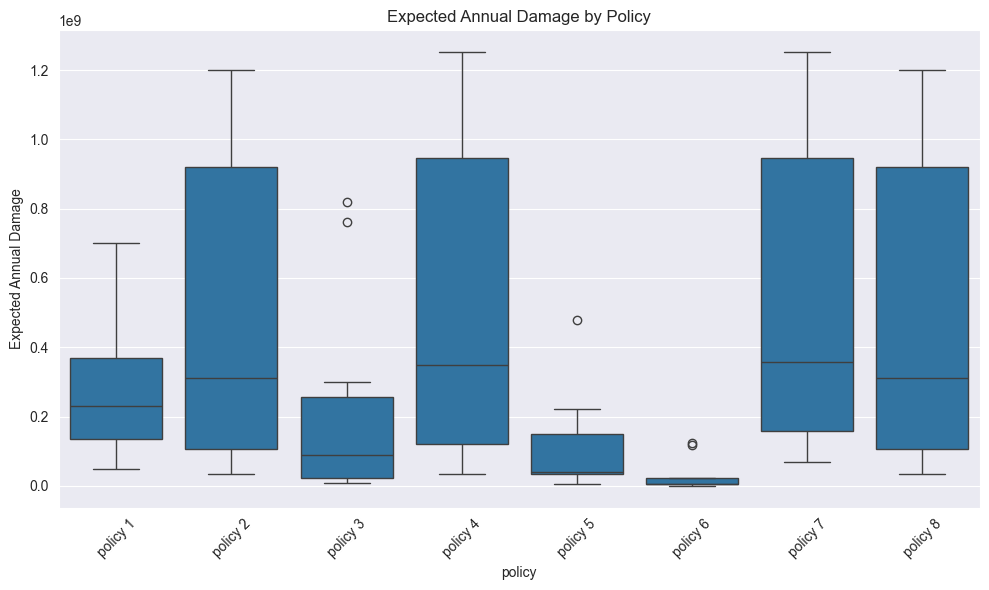

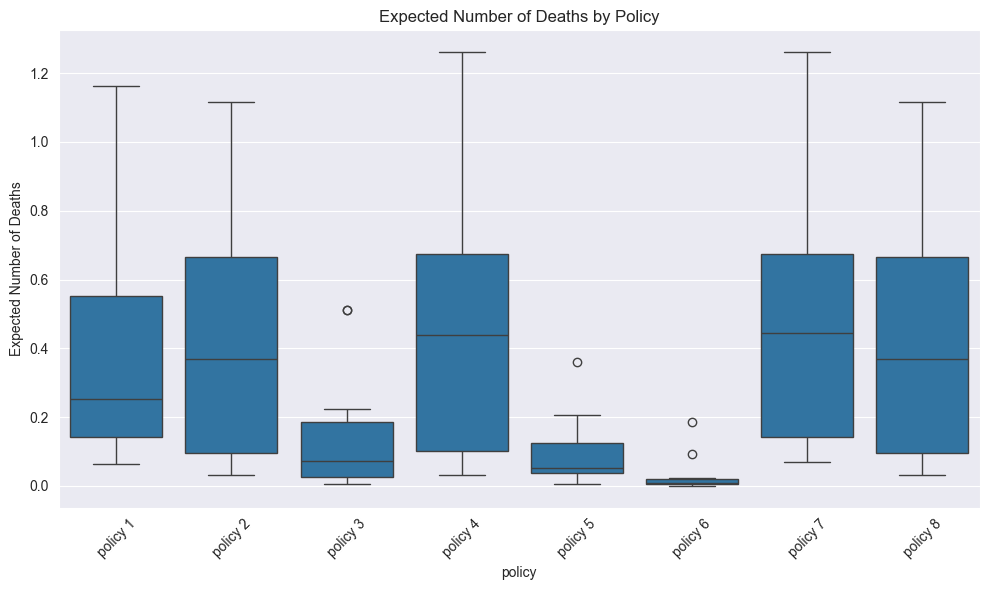

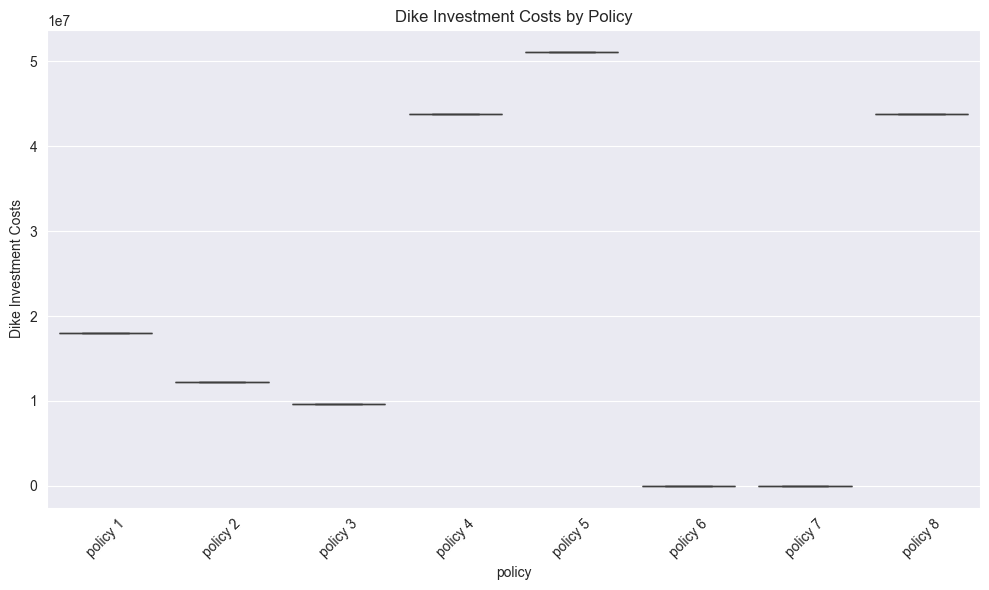

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

for outcome in ["Expected Annual Damage", "Expected Number of Deaths", "Dike Investment Costs"]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=summary_df, x="policy", y=outcome)
    plt.title(f"{outcome} by Policy")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



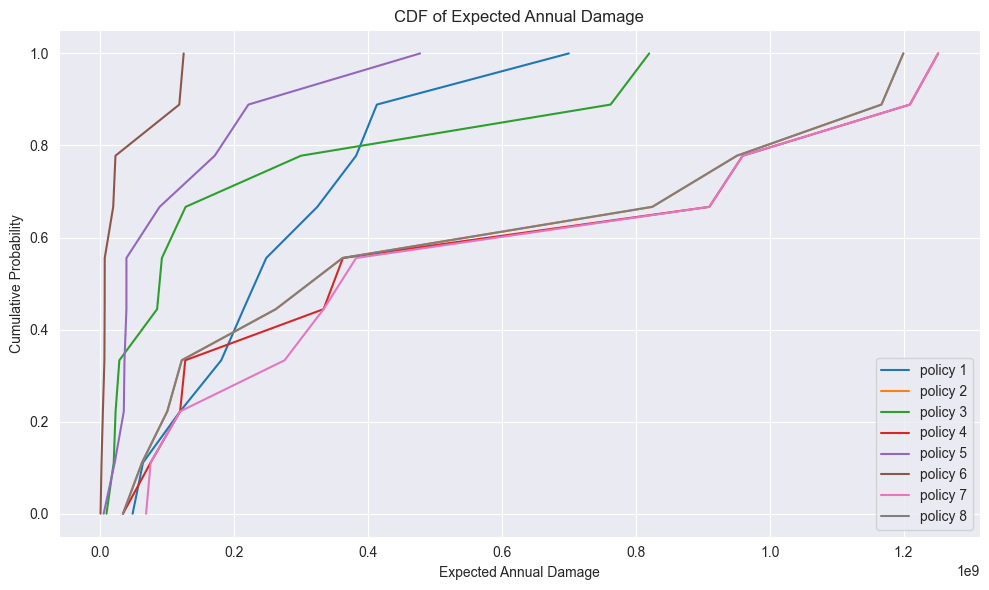

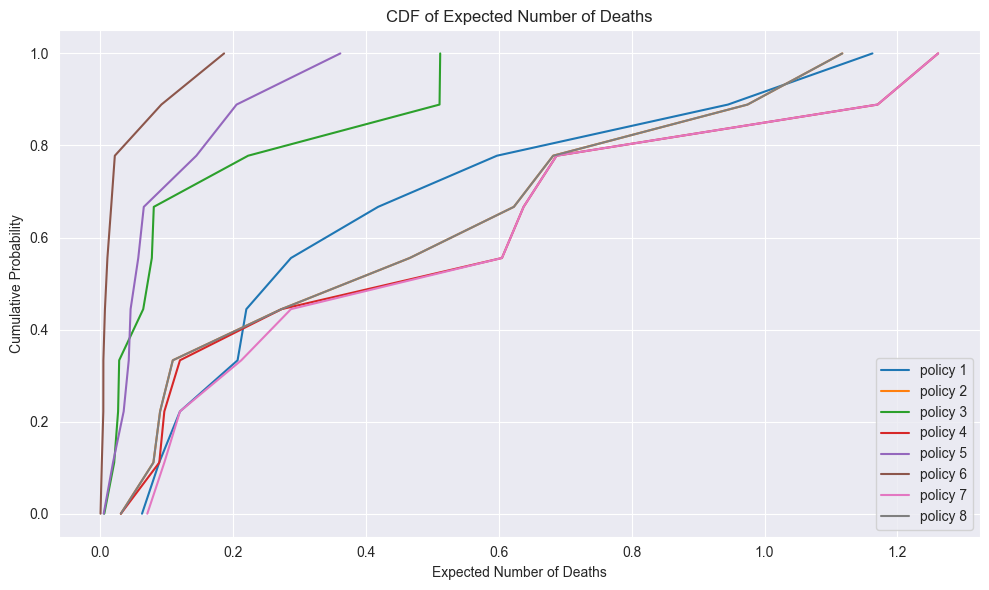

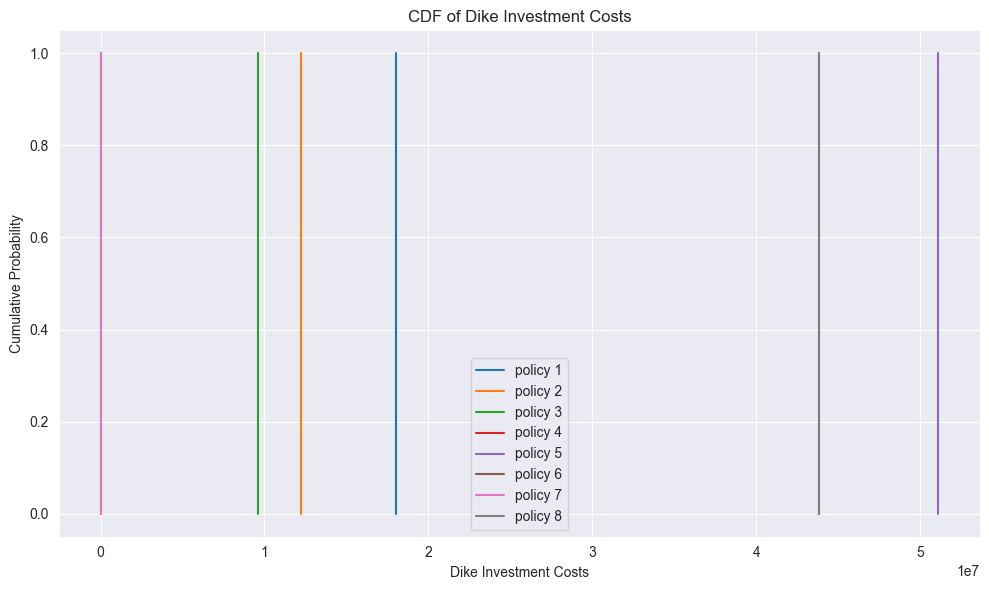

In [23]:
import numpy as np
import matplotlib.pyplot as plt

for outcome in ["Expected Annual Damage", "Expected Number of Deaths", "Dike Investment Costs"]:
    plt.figure(figsize=(10, 6))
    for policy in summary_df["policy"].unique():
        subset = summary_df[summary_df["policy"] == policy]
        sorted_vals = np.sort(subset[outcome])
        cdf = np.linspace(0, 1, len(sorted_vals))
        plt.plot(sorted_vals, cdf, label=policy)
    plt.title(f"CDF of {outcome}")
    plt.xlabel(outcome)
    plt.ylabel("Cumulative Probability")
    plt.legend()
    plt.tight_layout()
    plt.show()


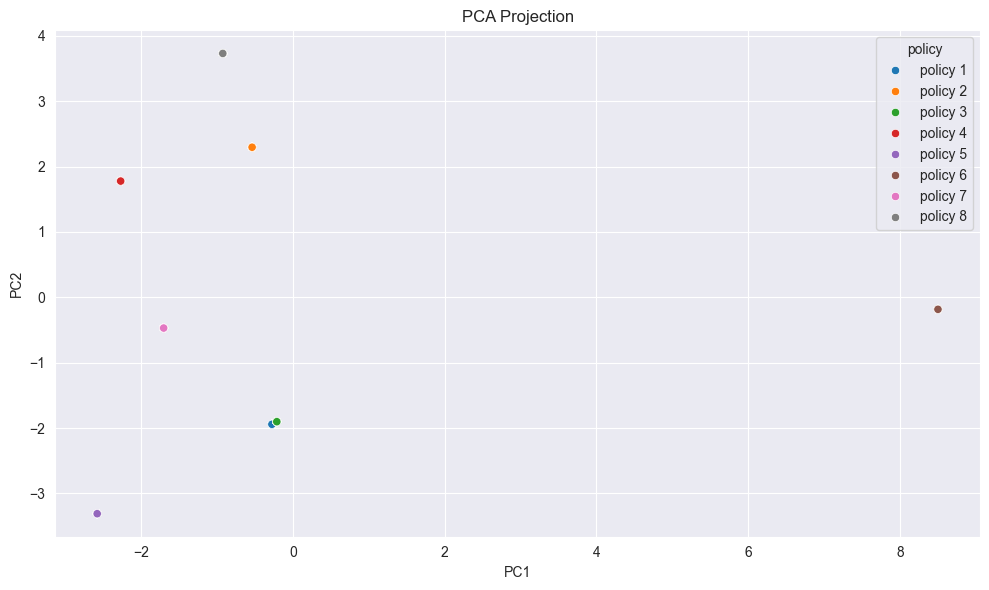

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Drop non-numeric and outcome columns
drop_cols = ["policy", "model", "Expected Annual Damage", "Expected Number of Deaths", "Dike Investment Costs"]
features = summary_df.drop(columns=drop_cols)

# Now scale and run PCA
scaled = StandardScaler().fit_transform(features)
components = PCA(n_components=2).fit_transform(scaled)

pca_df = pd.DataFrame(components, columns=["PC1", "PC2"])
pca_df["policy"] = summary_df["policy"]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="policy")
plt.title("PCA Projection")
plt.tight_layout()
plt.show()



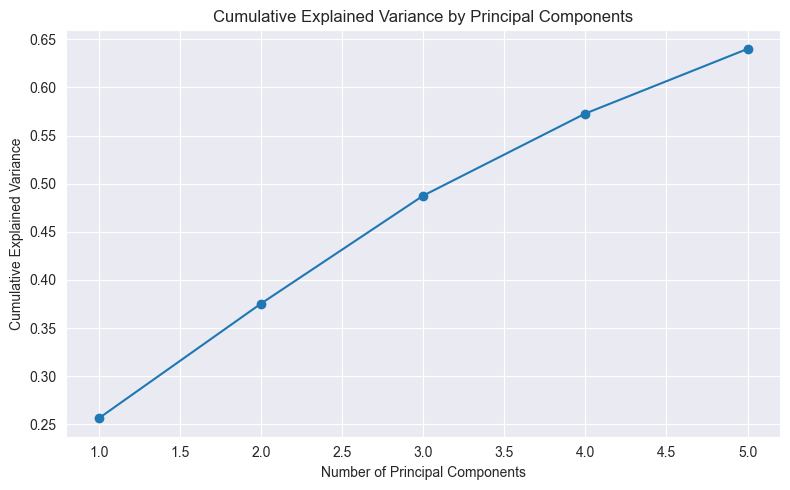

In [27]:
pca = PCA(n_components=5)
pca.fit(scaled)
explained_var = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), explained_var.cumsum(), marker='o')
plt.title("Cumulative Explained Variance by Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.tight_layout()
plt.show()


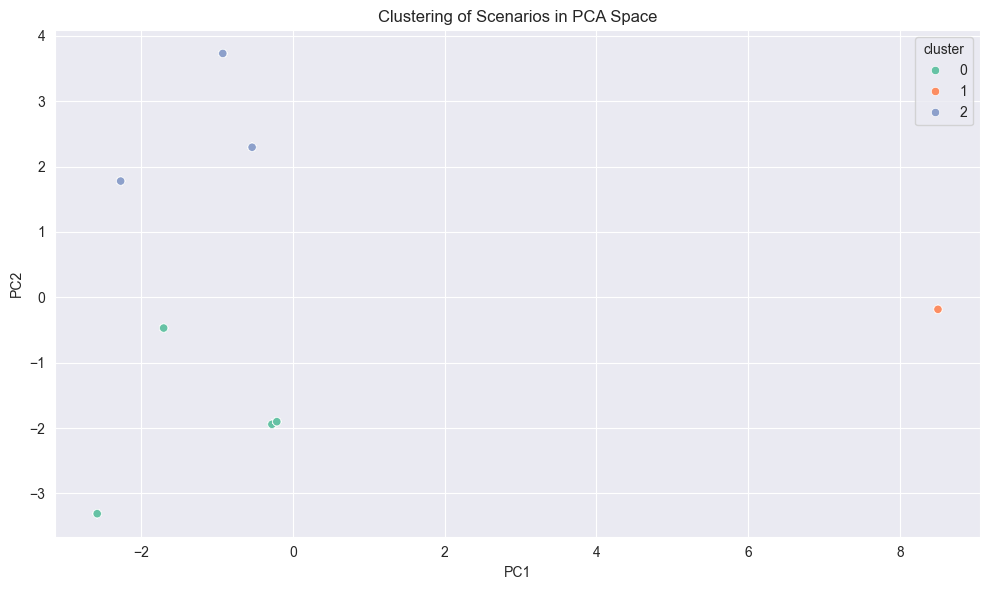

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(components)
pca_df["cluster"] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="cluster", palette="Set2")
plt.title("Clustering of Scenarios in PCA Space")
plt.tight_layout()
plt.show()


[MainProcess/INFO] column model dropped from analysis because it has only one category
[MainProcess/INFO] 80 points remaining, containing 76 cases of interest
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
[MainProcess/INFO] mean: 1.0, mass: 0.7875, coverage: 0.8289473684210527, density: 1.0 restricted_dimensions: 2


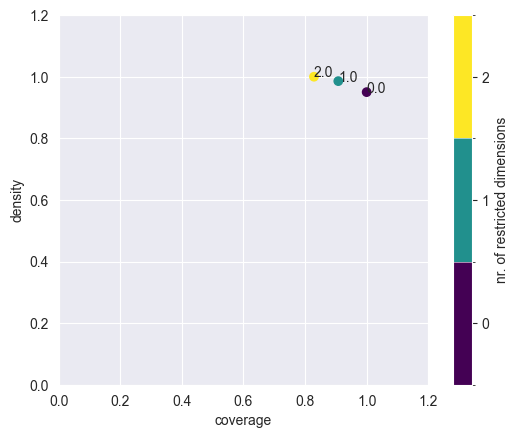

AttributeError: 

In [38]:
from ema_workbench.analysis import prim
from ema_workbench import ema_logging
import matplotlib.pyplot as plt

ema_logging.log_to_stderr(ema_logging.INFO)

# Define your outcome of interest
y = summary_df["Expected Annual Damage"] > 6e6

# Define input features (uncertainties)
x = summary_df.drop(columns=[
    "policy",
    "Expected Annual Damage",
    "Expected Number of Deaths",
    "Dike Investment Costs",
    "RfR Total Costs",
    "Expected Evacuation Costs"
])

# Run PRIM
prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

# Plot trade-off
box1.show_tradeoff(annotated=True)
plt.show()

# Inspect discovered boxes
for i in range(len(box1.boxes)):
    print(f"\nInspecting box {i}")
    box1.inspect(i, style='graph')
    plt.show()


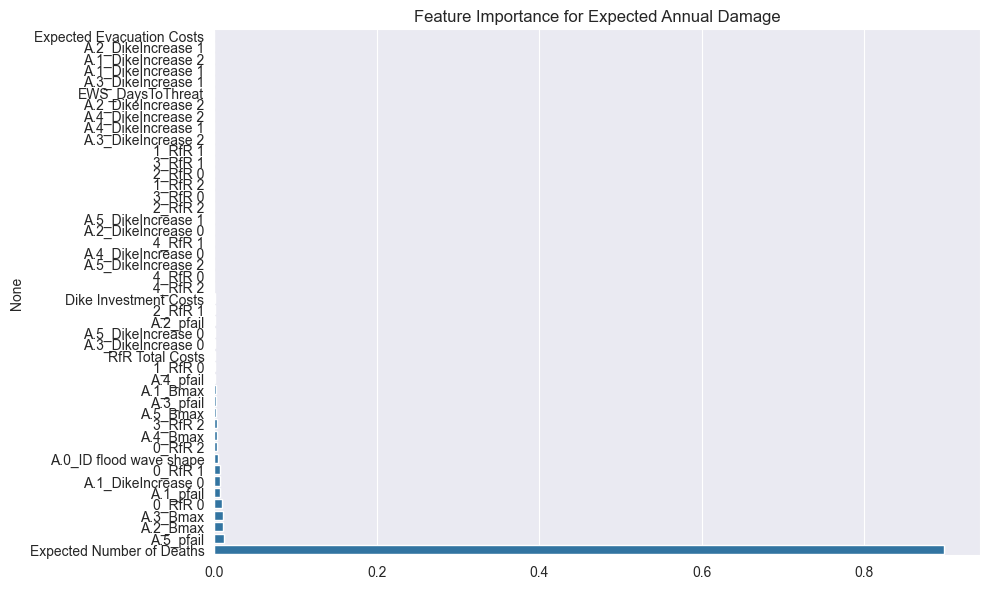

In [40]:
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

X = summary_df.select_dtypes(include=[float, int])  # Only numeric columns
X = X.drop(columns=["Expected Annual Damage"])      # Drop the target
y = summary_df["Expected Annual Damage"]

rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance for Expected Annual Damage")
plt.tight_layout()
plt.show()
